In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
df=pd.read_csv('quikr_car.csv')

In [155]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


DATA PREPROCESSING

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [157]:
def company_name(text):
  name=text.split(' ')[0]
  return name

In [158]:
df['company']=df['name'].apply(company_name)

In [159]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [160]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [161]:
def valid_year(text):
  if text.isnumeric():
    return int(text)
  else:
    return np.nan

In [162]:
df['year']=df['year'].apply(valid_year)

In [163]:
df['year'].unique()

array([2007., 2006., 2018., 2014., 2015., 2012., 2013., 2016., 2010.,
       2017., 2008., 2011., 2019., 2009., 2005., 2000.,   nan, 2003.,
       2004., 1995., 2002., 2001.])

In [164]:
df['year'].nunique()

21

In [165]:
df['year'].isnull().sum()

50

In [166]:
len(df)

892

In [167]:
df['year'].value_counts()

,count
year,
2015.0,117
2014.0,94
2013.0,94
2016.0,76
2012.0,75
2011.0,60
2009.0,56
2017.0,56
2010.0,44


In [168]:
median_year=df['year'].median()
median_year

2013.0

In [169]:
df['year'].fillna(median_year,inplace=True)

<ipython-input-169-8963d05c6491>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(median_year,inplace=True)


In [170]:
df['year'].isnull().sum()

0

In [171]:
df['fuel_type'].value_counts()

,count
fuel_type,
Petrol,440
Diesel,395
LPG,2


In [172]:
df=df[df['fuel_type']!='LPG']

In [173]:
df['fuel_type'].value_counts()

,count
fuel_type,
Petrol,440
Diesel,395


In [174]:
df['kms_driven'].isna().sum()

52

In [175]:
df['kms_driven'].fillna('0',inplace=True)

<ipython-input-175-38068ccb09cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kms_driven'].fillna('0',inplace=True)


In [176]:
df['kms_driven'].isna().sum()

0

In [177]:
df['kms_driven'].value_counts()

,count
kms_driven,
0,52
"45,000 kms",30
"35,000 kms",30
"55,000 kms",25
"50,000 kms",23
...,...
"1,03,553 kms",1
"29,685 kms",1
"30,874 kms",1


In [178]:
def remove_km(text):
  a=text.split(' ')[0]
  a=a.replace(',','')
  return a

In [179]:
# df['kms_driven']=df['kms_driven'].astype(str)

In [180]:
df['kms_driven']=df['kms_driven'].apply(remove_km)

In [181]:
df['kms_driven'] = df['kms_driven'].fillna('0')

In [188]:
df[df['kms_driven']=='Petrol']

,name,company,year,Price,kms_driven,fuel_type
890,Honda Amaze 1.2 E i VTEC,Honda,2014.0,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014.0,"1,60,000",Petrol,NaN


In [189]:
df=df[df['kms_driven']!='Petrol']

In [191]:
df['kms_driven']=df['kms_driven'].astype(int)

In [192]:
df['kms_driven'].value_counts()

,count
kms_driven,
0,60
45000,30
35000,30
55000,25
50000,23
...,...
100200,1
65,1
29685,1


<Axes: >

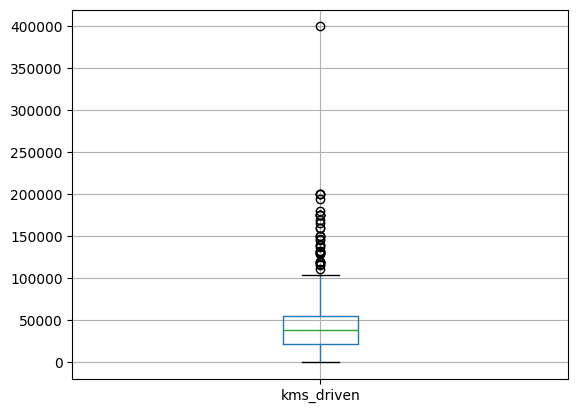

In [193]:
df.boxplot(column=['kms_driven'])

In [194]:
len(df)

888

In [210]:
#removing single outlier
df[df['kms_driven']==400000]
df=df[df['kms_driven']!=400000]

In [211]:
len(df)

887

In [214]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,"5,75,000",36000,Diesel


In [221]:
kms_median=df['kms_driven'].median()

In [223]:
def filling_kms(a):
  if a==0:
    return kms_median
  else:
    return a


In [224]:
df['kms_driven']=df['kms_driven'].apply(filling_kms)

In [225]:
df['kms_driven'].value_counts()

,count
kms_driven,
39000.0,75
45000.0,30
35000.0,30
55000.0,25
50000.0,23
...,...
59466.0,1
25500.0,1
44005.0,1


In [227]:
df.drop(columns=['name'],inplace=True)

In [238]:
df['Price'].value_counts()

,count
Price,
"2,50,000",17
"3,50,000",14
"1,30,000",12
"4,00,000",12
"1,80,000",12
...,...
"7,49,999",1
"11,30,000",1
"10,74,999",1


In [239]:
df['Price'] = df['Price'].replace('Ask For Price', np.nan)

In [240]:
df['Price'].isna().sum()

35

In [241]:
df['Price'].fillna('0',inplace=True)

<ipython-input-241-61c673c358d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna('0',inplace=True)


In [243]:
def setprice(text):
  text=text.replace(',','')
  return text

In [244]:
df['Price']=df['Price'].apply(setprice)

In [251]:
df['Price']=df['Price'].astype(int)

In [245]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007.0,80000,45000.0,Petrol
1,Mahindra,2006.0,425000,40.0,Diesel
2,Maruti,2018.0,0,22000.0,Petrol
3,Hyundai,2014.0,325000,28000.0,Petrol
4,Ford,2014.0,575000,36000.0,Diesel


In [254]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yama',
       'selling', 'URJE', 'Swift', 'Used', 'Jaguar', 'Hyun', 'Jeep',
       'tata', 'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7',
       '9', 'scratch', 'urgent', 'sell', 'Hyunda', 'TATA', 'Any', 'Ta'],
      dtype=object)

In [255]:
df = df[~df['company'].isin(['I', 'selling', 'URJE', 'Swift', 'Used', 'Jaguar', 'Hyun', 'Jeep', 'tata', 'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9', 'scratch', 'urgent', 'sell', 'Any', 'Ta'])]


In [256]:
len(df)

856

In [258]:
a=df[df['Price']==0]
len(a)

27

In [259]:
# Group by 'company' and 'year', then calculate multiple aggregations
grouped_data = df.groupby(['company', 'year']).agg(
    median=('Price', 'median')
).reset_index()

# To display the grouped data
print(grouped_data)


        company    year     median
0          Audi  2009.0   699000.0
1          Audi  2012.0  1474500.0
2          Audi  2013.0  1504500.0
3          Audi  2014.0  1445000.0
4          Audi  2015.0  3100000.0
..          ...     ...        ...
175  Volkswagen  2014.0   315000.0
176  Volkswagen  2015.0   340000.0
177  Volkswagen  2017.0   525000.0
178  Volkswagen  2019.0  1200000.0
179        Yama  2013.0    55000.0

[180 rows x 3 columns]


In [263]:
match_data=df[df['Price']==0]

In [266]:
# Merge match_data with grouped_data on 'company' and 'year' to get the median values
match_data = pd.merge(match_data, grouped_data[['company', 'year', 'median']], on=['company', 'year'], how='left')

# Update the 'Price' column where the value is 0 with the corresponding 'median' value from grouped_data
match_data['Price'] = match_data.apply(lambda row: row['median'] if row['Price'] == 0 else row['Price'], axis=1)

# Drop the 'median' column after updating 'Price'
match_data = match_data.drop(columns=['median'])

# Display the updated match_data
print(match_data)


       company    year     Price  kms_driven fuel_type
0       Maruti  2018.0  310000.0     22000.0    Petrol
1         Ford  2015.0       0.0     59000.0    Diesel
2       Maruti  2018.0  310000.0     28028.0    Petrol
3   Commercial  2013.0   90000.0     39000.0       NaN
4   Commercial  2013.0   90000.0     39000.0       NaN
5       Maruti  2010.0  154750.0     52000.0    Diesel
6         Tata  2017.0  235000.0     84000.0    Diesel
7         Tata  2013.0  150000.0     39000.0       NaN
8       Maruti  2018.0  310000.0     24000.0    Petrol
9       Maruti  2011.0  209500.0     16000.0    Petrol
10     Hyundai  2015.0  450000.0    180000.0    Diesel
11     Hyundai  2015.0  450000.0     35000.0    Petrol
12      Toyota  2009.0  240000.0     15574.0    Diesel
13      Datsun  2016.0  245000.0         5.0    Petrol
14    Mahindra  2018.0  560000.0      7500.0    Diesel
15      Maruti  2002.0   47500.0     56000.0    Petrol
16     Hyundai  2015.0  450000.0     49500.0    Petrol
17        

In [267]:
match_data=match_data[match_data['Price']!=0]

In [268]:
match_data

,company,year,Price,kms_driven,fuel_type
0,Maruti,2018.0,310000.0,22000.0,Petrol
2,Maruti,2018.0,310000.0,28028.0,Petrol
3,Commercial,2013.0,90000.0,39000.0,NaN
4,Commercial,2013.0,90000.0,39000.0,NaN
5,Maruti,2010.0,154750.0,52000.0,Diesel
6,Tata,2017.0,235000.0,84000.0,Diesel
7,Tata,2013.0,150000.0,39000.0,NaN
8,Maruti,2018.0,310000.0,24000.0,Petrol
9,Maruti,2011.0,209500.0,16000.0,Petrol
10,Hyundai,2015.0,450000.0,180000.0,Diesel


In [269]:
df=df[df['Price']!=0]

In [270]:
# Combine simple_df and match_df by stacking them vertically (along rows)
combined_df = pd.concat([df, match_data], ignore_index=True)

# Display the combined DataFrame
combined_df


,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra,2006.0,425000.0,40.0,Diesel
2,Hyundai,2014.0,325000.0,28000.0,Petrol
3,Ford,2014.0,575000.0,36000.0,Diesel
4,Ford,2012.0,175000.0,41000.0,Diesel
...,...,...,...,...,...
848,Hyundai,2019.0,900000.0,7000.0,Diesel
849,Renault,2016.0,122499.5,20000.0,Diesel
850,Maruti,2019.0,400000.0,1500.0,Petrol
851,Volkswagen,2015.0,340000.0,38900.0,Diesel


In [276]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra,2006.0,425000.0,40.0,Diesel
2,Hyundai,2014.0,325000.0,28000.0,Petrol
3,Ford,2014.0,575000.0,36000.0,Diesel
4,Ford,2012.0,175000.0,41000.0,Diesel


In [281]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan], dtype=object)

In [282]:
df['fuel_type'].isnull().sum()

25

In [284]:
# Fill NaN values in 'fuel_type' with the mode (most frequent category)
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])


print(df['fuel_type'].isnull().sum())

0


In [285]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra,2006.0,425000.0,40.0,Diesel
2,Hyundai,2014.0,325000.0,28000.0,Petrol
3,Ford,2014.0,575000.0,36000.0,Diesel
4,Ford,2012.0,175000.0,41000.0,Diesel


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     853 non-null    object 
 1   year        853 non-null    float64
 2   Price       853 non-null    float64
 3   kms_driven  853 non-null    float64
 4   fuel_type   853 non-null    object 
dtypes: float64(3), object(2)
memory usage: 33.4+ KB


In [290]:
df_encoded = pd.get_dummies(df, columns=['company', 'fuel_type'])
df_encoded


,year,Price,kms_driven,company_Audi,company_BMW,company_Chevrolet,company_Commercial,company_Datsun,company_Fiat,company_Force,...,company_Nissan,company_Renault,company_Skoda,company_TATA,company_Tata,company_Toyota,company_Volkswagen,company_Yama,fuel_type_Diesel,fuel_type_Petrol
0,2007.0,80000.0,45000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2006.0,425000.0,40.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2014.0,325000.0,28000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2014.0,575000.0,36000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2012.0,175000.0,41000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019.0,900000.0,7000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
849,2016.0,122499.5,20000.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
850,2019.0,400000.0,1500.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
851,2015.0,340000.0,38900.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [293]:
df=df_encoded
df

,year,Price,kms_driven,company_Audi,company_BMW,company_Chevrolet,company_Commercial,company_Datsun,company_Fiat,company_Force,...,company_Nissan,company_Renault,company_Skoda,company_TATA,company_Tata,company_Toyota,company_Volkswagen,company_Yama,fuel_type_Diesel,fuel_type_Petrol
0,2007.0,80000.0,45000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2006.0,425000.0,40.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2014.0,325000.0,28000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2014.0,575000.0,36000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2012.0,175000.0,41000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019.0,900000.0,7000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
849,2016.0,122499.5,20000.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
850,2019.0,400000.0,1500.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
851,2015.0,340000.0,38900.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [294]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to standardize
columns_to_scale = ['Price', 'kms_driven']

# Apply the scaler to these columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the result
print(df.head())


     year     Price  kms_driven  company_Audi  company_BMW  company_Chevrolet  \
0  2007.0 -0.705128   -0.024127         False        False              False   
1  2006.0  0.057690   -1.461355         False        False              False   
2  2014.0 -0.163416   -0.567563         False        False              False   
3  2014.0  0.389350   -0.311829         False        False              False   
4  2012.0 -0.495077   -0.151995         False        False              False   

   company_Commercial  company_Datsun  company_Fiat  company_Force  ...  \
0               False           False         False          False  ...   
1               False           False         False          False  ...   
2               False           False         False          False  ...   
3               False           False         False          False  ...   
4               False           False         False          False  ...   

   company_Nissan  company_Renault  company_Skoda  company_TAT

In [295]:
X = df.drop(columns=['Price'])
y = df['Price']

In [296]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [297]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [306]:
# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [307]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [308]:
# Evaluate the model using different metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.2843052289553869
Mean Squared Error (MSE): 0.45950877545298546
R-squared (R²): 0.2391211771600068


In [313]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


In [314]:
# Evaluate the model using different metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.30450040875759615
Mean Squared Error (MSE): 0.17892640180813307
R-squared (R²): 0.7037242436805276
